In [6]:
import pandas as pd

#### CollectInsertSizeMetrics

In [ ]:
%%bash 

parallel --xapply 'picard CollectInsertSizeMetrics \
I=input.bam \
O=insert_size_metrics.txt \
H=insert_size_histogram.pdf \
M=0.5' ::::()

#### CollectVariantCallingMetrics

In [ ]:
%%bash

picard -Xmx2048m CollectVariantCallingMetrics \
I=./HY19020837.vcf.gz \
O=/mnt/data_sata_2t/vsftpd/wxq/ftp/files/0306/HY19020837.gatk.metrics \
DBSNP=/home/jgs/database/gatk_bundle/GRCh37/ftp.broadinstitute.org/bundle/b37/dbsnp_138.b37.vcf \
TI=/mnt/data_sata_2t/vsftpd/wxq/ftp/files/0306/target.interval_list

#### CollectHsMetrics
> for target-seq qc data

In [14]:
%%bash

parallel --xapply picard -Xmx2048m CollectHsMetrics \
I=./{}.bam \
O=./{}.hs_metrics.txt \
R=/home/jgs/database/gatk_bundle/b37/human_g1k_v37.fasta \
TARGET_INTERVALS=./Agilent_V7.interval_list \
PER_TARGET_COVERAGE=./{}.coverage \
BAIT_INTERVALS=./Agilent_V7.interval_list \
PER_BASE_COVERAGE=./{}.basecov \
:::: v7list

INFO	2019-03-24 13:12:20	CollectHsMetrics	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CollectHsMetrics -I ./HY190310589.bam -O ./HY190310589.hs_metrics.txt -R /home/jgs/database/gatk_bundle/b37/human_g1k_v37.fasta -TARGET_INTERVALS ./Agilent_V7.interval_list -PER_TARGET_COVERAGE ./HY190310589.coverage -BAIT_INTERVALS ./Agilent_V7.interval_list -PER_BASE_COVERAGE ./HY190310589.basecov
**********


13:12:20.888 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/jgs/anaconda3/share/picard-2.18.27-0/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sun Mar 24 13:12:20 CST 2019] CollectHsMetrics BAIT_INTERVALS=[./Agilent_V7.interval_list] TARGET_INTERVALS=[./Agilent_V7.interva

In [17]:
%%bash

parallel --xapply picard -Xmx2048m CollectHsMetrics \
I=./{}.bam \
O=./{}.hs_metrics.txt \
R=/home/jgs/database/gatk_bundle/b37/human_g1k_v37.fasta \
TARGET_INTERVALS=./HESone5000.interval_list \
PER_TARGET_COVERAGE=./{}.coverage \
BAIT_INTERVALS=./HESone5000.interval_list \
PER_BASE_COVERAGE=./{}.basecov \
:::: HESone5000list

INFO	2019-03-24 13:23:31	CollectHsMetrics	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CollectHsMetrics -I ./HY190310589.bam -O ./HY190310589.hs_metrics.txt -R /home/jgs/database/gatk_bundle/b37/human_g1k_v37.fasta -TARGET_INTERVALS ./HESone5000.interval_list -PER_TARGET_COVERAGE ./HY190310589.coverage -BAIT_INTERVALS ./HESone5000.interval_list -PER_BASE_COVERAGE ./HY190310589.basecov
**********


13:23:31.787 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/jgs/anaconda3/share/picard-2.18.27-0/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Sun Mar 24 13:23:31 CST 2019] CollectHsMetrics BAIT_INTERVALS=[./HESone5000.interval_list] TARGET_INTERVALS=[./HESone5000.interva

### some preprocessing

In [8]:
pd.read_excel('Agilent_V7.xlsx').to_csv('Agilent_V7.bed', index=False, sep='\t', header=False)

In [10]:
pd.read_excel('HESone5000.xlsx').to_csv('HESone5000.bed', index=False, sep='\t', header=False)

In [ ]:
picard BedToIntervalList \
I=Agilent_V7.bed \
SD=/home/jgs/database/gatk_bundle/b37/human_g1k_v37.dict \
O=Agilent_V7.interval_listpicard 

In [ ]:
picard BedToIntervalList \
I=HESone5000.bed \
SD=/home/jgs/database/gatk_bundle/b37/human_g1k_v37.dict \
O=HESone5000.interval_listpicard 

### target-seq depth statistics
- v7
- panel

In [28]:
with open('v7list', 'r') as f:
    l = f.read().strip('\n').split('\n')
    df = pd.DataFrame({'chr':[], 'pos':[]})
    for i,s in enumerate(l):
        df = df.merge(pd.read_table('%s.depth'%(s), names=['chr', 'pos', '%s'%(s)]), how='outer')

In [36]:
df.drop(['chr','pos'], axis=1).head()

,HY190310589,HY190310590,HY190310593,HY190310594
0,1.0,1.0,2.0,2.0
1,1.0,1.0,2.0,3.0
2,1.0,1.0,2.0,3.0
3,1.0,1.0,2.0,3.0
4,1.0,1.0,2.0,3.0


In [38]:
import numpy as np
%matplotlib inline

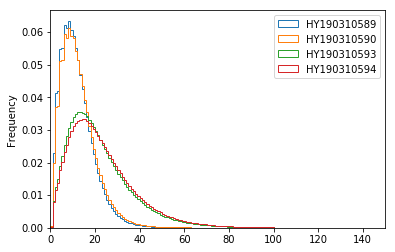

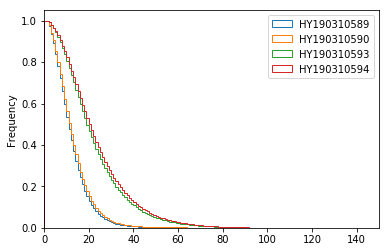

In [39]:
df.drop(['chr','pos'], axis=1).plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step')
df.drop(['chr','pos'], axis=1).plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step', cumulative=-1)

/home/jgs/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


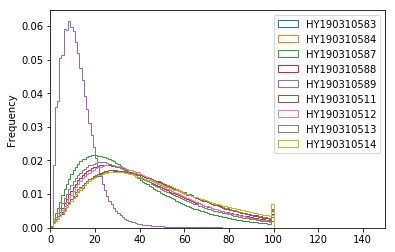

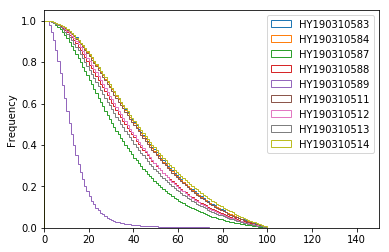

In [41]:
with open('HESone5000list', 'r') as f:
    l = f.read().strip('\n').split('\n')
    df1 = pd.DataFrame({'chr':[], 'pos':[]})
    for i,s in enumerate(l):
        df1 = df1.merge(pd.read_table('%s.depth'%(s), names=['chr', 'pos', '%s'%(s)]), how='outer')
        
df1.drop(['chr','pos'], axis=1).plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step')
df1.drop(['chr','pos'], axis=1).plot(kind='hist', bins=np.linspace(0,100,101), xlim=[0,150], density=1, histtype='step', cumulative=-1)

In [56]:
tmp = df.HY190310589.value_counts().sort_index()

In [62]:
tmp.cumsum

,HY190310594
0,11039
1,373206
2,549825
3,642529
4,823111


In [59]:
with open('HESone5000list', 'r') as f:
    l = f.read().strip('\n').split('\n')
    for i,s in enumerate(l):
        tmp = pd.read_table('%s.depth'%(s), names=['chr', 'pos', '%s'%(s)])
        tmp = pd.DataFrame(tmp['%s'%(s)].value_counts()).sort_index()
        tmp.to_excel('%s.depth_count.xlsx'%(s))

In [60]:
with open('v7list', 'r') as f:
    l = f.read().strip('\n').split('\n')
    for i,s in enumerate(l):
        tmp = pd.read_table('%s.depth'%(s), names=['chr', 'pos', '%s'%(s)])
        tmp = pd.DataFrame(tmp['%s'%(s)].value_counts()).sort_index()
        tmp.to_excel('%s.depth_count.xlsx'%(s))